# Health Conditions Contributing to COVID-19 Deaths, Age, Provisional 2020-2023 in USA

### Background:
### COVID-19 (coronavirus disease 2019) is a disease caused by a virus named SARS-CoV-2 and was discovered in December 2019 in Wuhan, China. It is very contagious and has quickly spread around the world. COVID-19 most often causes respiratory symptoms that can feel much like a cold, a flu, or pneumonia.

#### Objective:
#### The main goal of this data-analysis is to compare the result obtained in main project with a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

#### Data-set Content:
#### •	Data As Of: Date of analysis
#### •	Start Date: First week-ending date of data period
#### •	End Date: Last week-ending date of data period
#### •	Group: Time-period indicator for record: by Month, by Year, Total
#### •	Year: Year in which death occurred
#### •	Month: Month in which death occurred
#### •	State: Jurisdiction of occurrence
#### •	Condition Group: Condition Group
#### •	Condition: Condition contributing to deaths involving COVID-19
#### •	ICD10_codes: ICD-10 code for condition
#### •	Age Group: Age group
#### •	COVID-19 Deaths: COVID 19 Deaths
#### •	Number of Mentions: Number of mentions
#### •	Flag: Counts less than 10 supressed


#### Source: https://data.cdc.gov/NCHS/Conditions-Contributing-to-COVID-19-Deaths-by-Stat/hk9y-quqm

#### file name: Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv

### Import our dependencies & Data importing: 

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 




In [2]:
#  Import and read the CDC_data.csv.
import pandas as pd 
df = pd.read_csv("CDC_data.csv")
df.head()

C:\Users\Admin\anaconda3\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,02/19/2023,01/01/2020,02/18/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,"1,501","1,571",NaN
1,02/19/2023,01/01/2020,02/18/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"5,720","5,937",NaN
2,02/19/2023,01/01/2020,02/18/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"14,918","15,534",NaN
3,02/19/2023,01/01/2020,02/18/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"37,069","38,520",NaN
4,02/19/2023,01/01/2020,02/18/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"81,678","84,660",NaN


In [3]:
# Filter the Group column by Year
byyear_df = df.loc[(df['Group'] == "By Year")]
byyear_df.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
12420,02/19/2023,01/01/2020,12/31/2020,By Year,"2,020",NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,249,256,NaN
12421,02/19/2023,01/01/2021,12/31/2021,By Year,"2,021",NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,893,933,NaN
12422,02/19/2023,01/01/2022,12/31/2022,By Year,"2,022",NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,350,372,NaN
12423,02/19/2023,01/01/2023,02/18/2023,By Year,"2,023",NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,9,10,NaN
12424,02/19/2023,01/01/2020,12/31/2020,By Year,"2,020",NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,112","1,131",NaN


In [4]:
# Filter the State for United States 
byyear_US_df = byyear_df.loc[(byyear_df['State'] == "United States")]
byyear_US_df.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
12420,02/19/2023,01/01/2020,12/31/2020,By Year,"2,020",NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,249,256,NaN
12421,02/19/2023,01/01/2021,12/31/2021,By Year,"2,021",NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,893,933,NaN
12422,02/19/2023,01/01/2022,12/31/2022,By Year,"2,022",NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,350,372,NaN
12423,02/19/2023,01/01/2023,02/18/2023,By Year,"2,023",NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,9,10,NaN
12424,02/19/2023,01/01/2020,12/31/2020,By Year,"2,020",NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,112","1,131",NaN


In [5]:
# Drop the unwanted columns for data-analysis 'Data As Of','Start Date','End Date','Group','Month','Condition','ICD10_codes','Number of Mentions','Flag'
byyear_US_df=byyear_US_df.drop(byyear_US_df[['Data As Of','Start Date','End Date','Group','Month','Condition','ICD10_codes','Number of Mentions','Flag']], axis=1)
byyear_US_df.head()

,Year,State,Condition Group,Age Group,COVID-19 Deaths
12420,"2,020",United States,Respiratory diseases,0-24,249
12421,"2,021",United States,Respiratory diseases,0-24,893
12422,"2,022",United States,Respiratory diseases,0-24,350
12423,"2,023",United States,Respiratory diseases,0-24,9
12424,"2,020",United States,Respiratory diseases,25-34,"1,112"


In [6]:
# check if any cell has NaN value
byyear_US_df.isna().sum()

Year               0
State              0
Condition Group    0
Age Group          0
COVID-19 Deaths    0
dtype: int64

In [7]:
# Filtered out the "Not stated" raw from the dataset
byyear_US_df = byyear_US_df.loc[(byyear_US_df['Age Group'] != "Not stated")]
byyear_US_df

,Year,State,Condition Group,Age Group,COVID-19 Deaths
12420,"2,020",United States,Respiratory diseases,0-24,249
12421,"2,021",United States,Respiratory diseases,0-24,893
12422,"2,022",United States,Respiratory diseases,0-24,350
12423,"2,023",United States,Respiratory diseases,0-24,9
12424,"2,020",United States,Respiratory diseases,25-34,"1,112"
...,...,...,...,...,...
13331,"2,023",United States,COVID-19,85+,"6,704"
13336,"2,020",United States,COVID-19,All Ages,"385,293"
13337,"2,021",United States,COVID-19,All Ages,"463,274"
13338,"2,022",United States,COVID-19,All Ages,"244,816"


In [8]:
# # Filtered out the "All Ages" raw from the dataset
byyear_US_df = byyear_US_df.loc[(byyear_US_df['Age Group'] != "All Ages")]
byyear_US_df

,Year,State,Condition Group,Age Group,COVID-19 Deaths
12420,"2,020",United States,Respiratory diseases,0-24,249
12421,"2,021",United States,Respiratory diseases,0-24,893
12422,"2,022",United States,Respiratory diseases,0-24,350
12423,"2,023",United States,Respiratory diseases,0-24,9
12424,"2,020",United States,Respiratory diseases,25-34,"1,112"
...,...,...,...,...,...
13327,"2,023",United States,COVID-19,75-84,"4,891"
13328,"2,020",United States,COVID-19,85+,"122,785"
13329,"2,021",United States,COVID-19,85+,"95,256"
13330,"2,022",United States,COVID-19,85+,"73,119"


In [9]:
# Rename the column 'Age Group' to 'AgeGroup'
byyear_US_df.rename(columns = {'Age Group':'AgeGroup'}, inplace = True)
byyear_US_df.columns

C:\Users\Admin\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['Year', 'State', 'Condition Group', 'AgeGroup', 'COVID-19 Deaths'], dtype='object')

In [10]:
# Rename the column 'COVID-19 Deaths' to 'Deaths'
byyear_US_df.rename(columns = {'COVID-19 Deaths':'Deaths'}, inplace = True)
byyear_US_df.columns

Index(['Year', 'State', 'Condition Group', 'AgeGroup', 'Deaths'], dtype='object')

In [11]:
# Rename the column 'Condition Group' to 'Condition_Group'
byyear_US_df.rename(columns = {'Condition Group':'Condition_Group'}, inplace = True)
byyear_US_df.columns

Index(['Year', 'State', 'Condition_Group', 'AgeGroup', 'Deaths'], dtype='object')

In [12]:
# Determine the number of unique values in each column.
byyear_US_df.nunique()

Year                 4
State                1
Condition_Group     12
AgeGroup             8
Deaths             601
dtype: int64

In [13]:
# Look at CONDITION_TYPE value counts for binning

condition_count = byyear_US_df.Condition_Group.value_counts()
condition_count

Circulatory diseases                                                         224
Respiratory diseases                                                         192
Sepsis                                                                        32
Malignant neoplasms                                                           32
Diabetes                                                                      32
Obesity                                                                       32
Alzheimer disease                                                             32
Vascular and unspecified dementia                                             32
Renal failure                                                                 32
Intentional and unintentional injury, poisoning, and other adverse events     32
All other conditions and causes (residual)                                    32
COVID-19                                                                      32
Name: Condition_Group, dtype

In [14]:
# Check the columns data type
byyear_US_df.dtypes


Year               object
State              object
Condition_Group    object
AgeGroup           object
Deaths             object
dtype: object

In [15]:
# Change datatype Deaths from String to integer
import numpy as np
byyear_US_df['Deaths'] = byyear_US_df['Deaths'].str.replace(',','').astype(int)

C:\Users\Admin\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# Check the data types
byyear_US_df.dtypes


Year               object
State              object
Condition_Group    object
AgeGroup           object
Deaths              int32
dtype: object

In [17]:
# Drop the State columns
byyear_US_df=byyear_US_df.drop('State',axis=1)
byyear_US_df.head()

,Year,Condition_Group,AgeGroup,Deaths
12420,"2,020",Respiratory diseases,0-24,249
12421,"2,021",Respiratory diseases,0-24,893
12422,"2,022",Respiratory diseases,0-24,350
12423,"2,023",Respiratory diseases,0-24,9
12424,"2,020",Respiratory diseases,25-34,1112


In [20]:
# Group the Health condition_Group with Death 
byyear_US_aggregated = byyear_US_df.groupby("Condition_Group").sum().sort_values('Deaths',ascending=True)
byyear_US_aggregated

,Deaths
Condition_Group,
"Intentional and unintentional injury, poisoning, and other adverse events",29055
Alzheimer disease,33712
Obesity,52512
Malignant neoplasms,67013
Vascular and unspecified dementia,88976
Sepsis,114792
Renal failure,125408
Diabetes,164193
All other conditions and causes (residual),457747


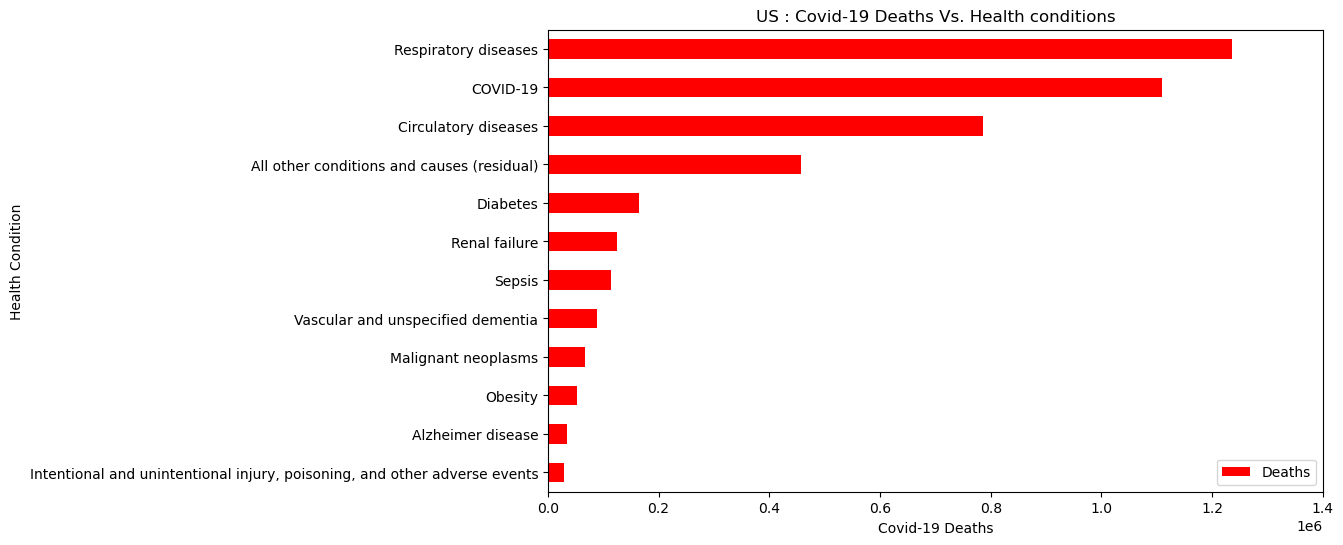

<Figure size 2000x1500 with 0 Axes>

In [21]:
# Plot the US : Covid-19 Death Vs. Health conditions
byyear_US_aggregated.plot.barh(color='red',xlim=(0,1400000), figsize=(10,6),stacked=True)
plt.xticks(rotation=0)

plt.ylabel("Health Condition")
plt.xlabel("Covid-19 Deaths")
plt.title("US : Covid-19 Deaths Vs. Health conditions")
plt.legend()
plt.figure(figsize=(20, 15))
plt.show()



In [22]:
# Group the Health Condition & Age_Group  with Death 
byyear_US_aggr = byyear_US_df.groupby(['Condition_Group', 'AgeGroup']).agg({'Deaths':sum}).sort_values('Deaths',ascending=True)
byyear_US_aggr

Deaths
Condition_Group                   AgeGroup        
Vascular and unspecified dementia 0-24           0
Alzheimer disease                 0-24           0
                                  25-34          2
Vascular and unspecified dementia 25-34          2
Alzheimer disease                 35-44          3
...                                            ...
Respiratory diseases              85+       270262
COVID-19                          75-84     289018
                                  85+       297864
Respiratory diseases              65-74     308241
                                  75-84     327969

[96 rows x 1 columns]

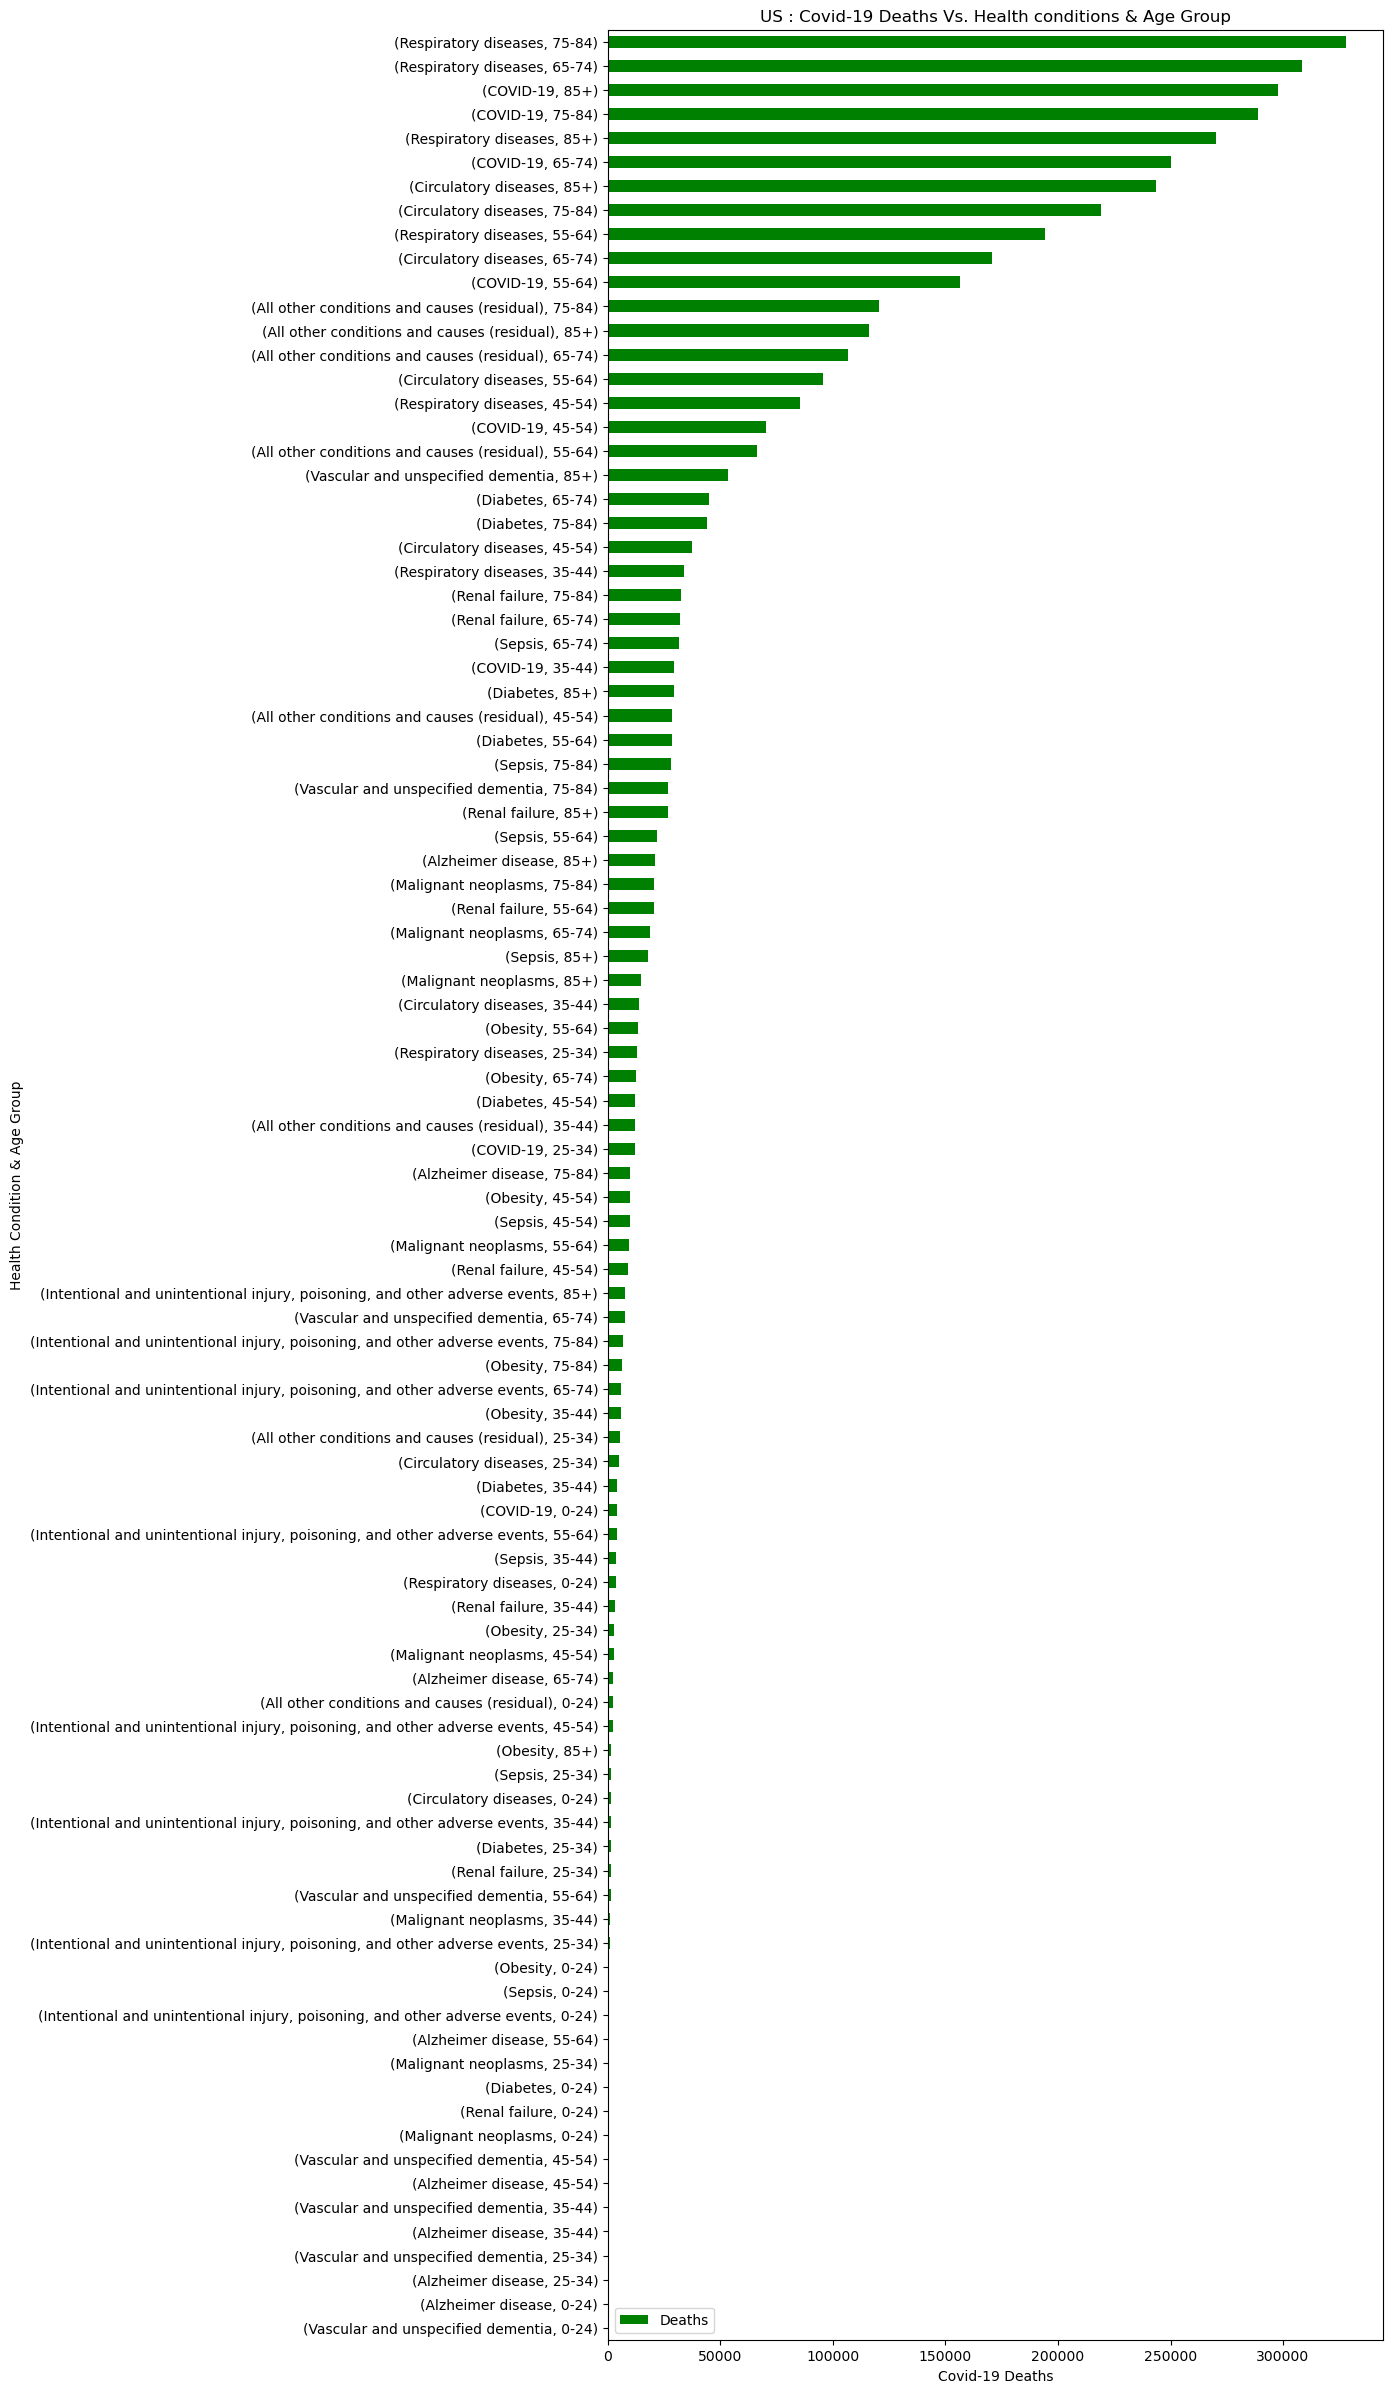

In [23]:
# Plot the US : Covid-19 Death Vs. Health conditions
byyear_US_aggr.plot.barh(color='green',figsize=(10,30))

plt.ylabel("Health Condition & Age Group")
plt.xlabel("Covid-19 Deaths")
plt.title("US : Covid-19 Deaths Vs. Health conditions & Age Group")
plt.legend()
plt.show()

In [26]:
# Group the Age_Group  with Death 
byyear_US_age = byyear_US_df.groupby(['AgeGroup']).agg({'Deaths':sum}).sort_values('Deaths',ascending=True)
byyear_US_age

,Deaths
AgeGroup,
0-24,13358
25-34,42675
35-44,108512
45-54,267188
55-64,611103
65-74,991324
85+,1099906
75-84,1131022


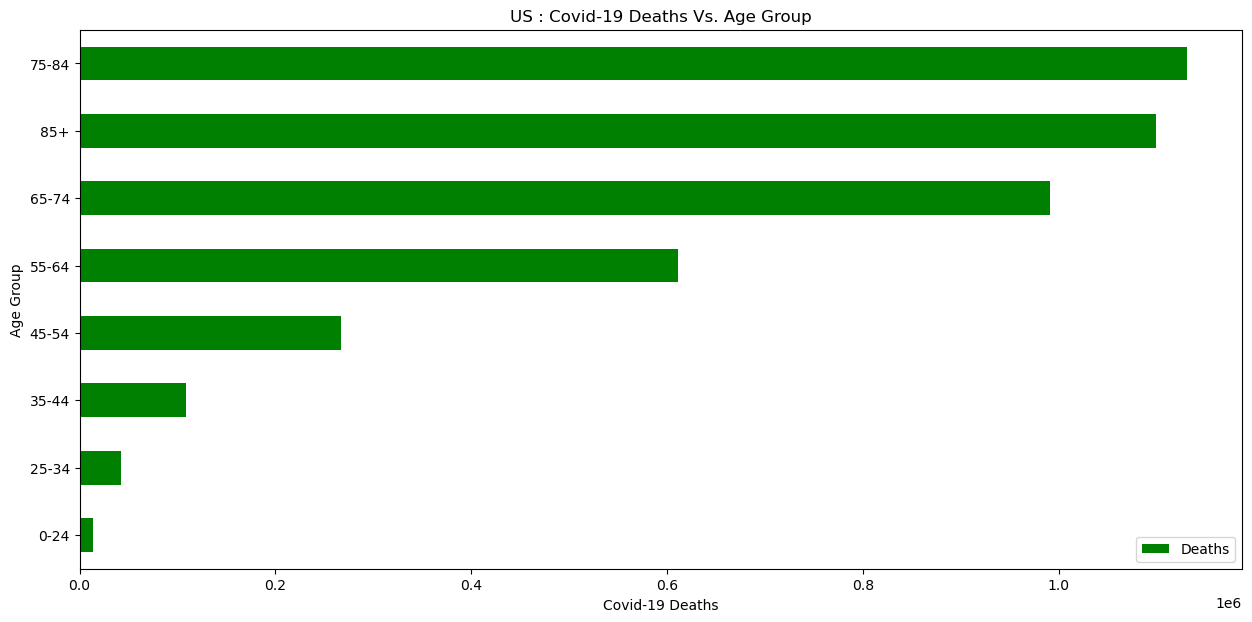

In [27]:
# Plot the US : Covid-19 Death Vs. Age Group
byyear_US_age.plot.barh(color='green',figsize=(15,7))

plt.ylabel("Age Group")
plt.xlabel("Covid-19 Deaths")
plt.title("US : Covid-19 Deaths Vs. Age Group")
plt.legend()
plt.show()

In [28]:
# Group the Year  with Death 
byyear_US_year = byyear_US_df.groupby(['Year']).agg({'Deaths':sum}).sort_values('Year')
byyear_US_year

,Deaths
Year,
"2,020",1431197
"2,021",1790332
"2,022",978214
"2,023",65345


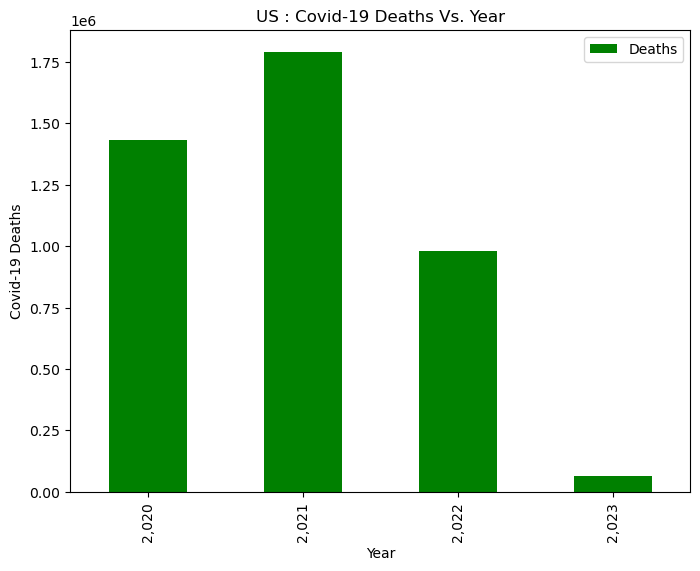

In [30]:
# Plot the US : Covid-19 Death Vs. Year
byyear_US_year.plot.bar(color='green',figsize=(8,6))

plt.xlabel("Year")
plt.ylabel("Covid-19 Deaths")
plt.title("US : Covid-19 Deaths Vs. Year")
plt.legend()
plt.show()